In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import warnings
warnings.filterwarnings('ignore')
from nltk.corpus import stopwords
import string

In [3]:
from sklearn.metrics import classification_report, confusion_matrix,roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [191]:
import scipy

In [4]:
df = pd.read_csv('/Users/user/Desktop/Progress/1/Udemy - Python for Data Science and Machine Learning/17. Logistic Regression/13-Logistic-Regression/titanic_train.csv')

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

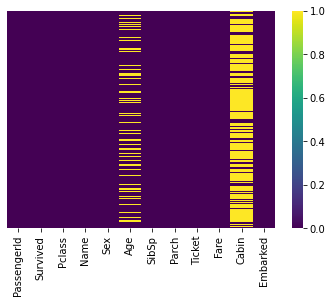

In [7]:
sns.heatmap(df.isnull(),cmap='viridis',yticklabels=False,annot=False)

In [8]:
df.drop('Cabin', inplace=True,axis=1)

<AxesSubplot:xlabel='Survived', ylabel='Age'>

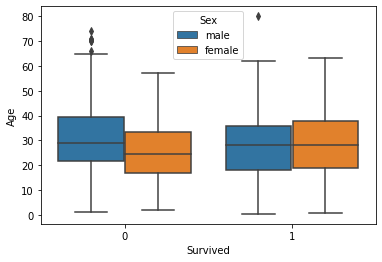

In [9]:
sns.boxplot(data=df,x='Survived',y='Age',hue='Sex')

In [11]:
# df['Age'][df['Pclass']==1].fillna(38.233440860215055,inplace=True)
# df['Age'][df['Pclass']==2].fillna(29.87763005780347,inplace=True)
# df['Age'][df['Pclass']==3].fillna(25.14061971830986,inplace=True)

In [10]:
df['Age'][df['Pclass']==1] = df['Age'][df['Pclass']==1].replace(to_replace=np.nan, value=df['Age'][df['Pclass']==1].mean(),inplace=False)
df['Age'][df['Pclass']==2] = df['Age'][df['Pclass']==2].replace(to_replace=np.nan, value=df['Age'][df['Pclass']==2].mean(),inplace=False)
df['Age'][df['Pclass']==3] = df['Age'][df['Pclass']==3].replace(to_replace=np.nan, value=df['Age'][df['Pclass']==3].mean(),inplace=False)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [12]:
sex = {'female':0,'male':1}
df['Sex'] = df['Sex'].map(sex)
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C


<AxesSubplot:xlabel='Embarked', ylabel='count'>

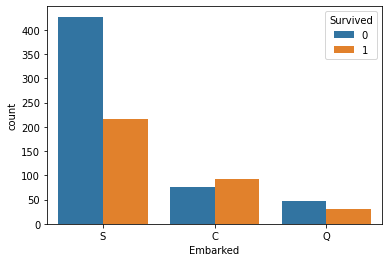

In [13]:
sns.countplot(df['Embarked'],hue=df['Survived'])

<AxesSubplot:xlabel='Sex', ylabel='count'>

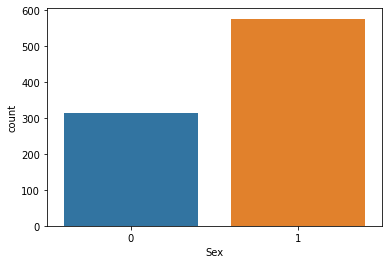

In [14]:
sns.countplot(df['Sex'])

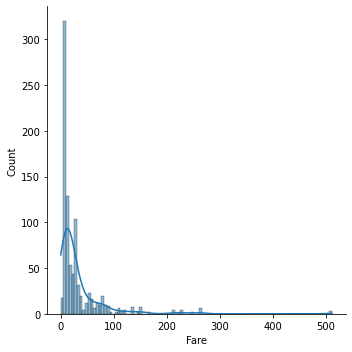

In [15]:
sns.displot(df['Fare'],bins=100,kde=True)

In [16]:
embarked = {'S':0,'C':1,'Q':2}
df['Embarked'] = df['Embarked'].map(embarked)
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1.0


In [320]:
df.tail(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.00,1.0
890,891,0,3,"Dooley, Mr. Patrick",1,32.0,0,0,370376,7.75,2.0


In [321]:
df_new = df.dropna(how='any',axis=0)

In [322]:
df_new.tail(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.00,1.0
890,891,0,3,"Dooley, Mr. Patrick",1,32.0,0,0,370376,7.75,2.0


In [93]:
df_new['z_score'] = (df_new['Age']-df_new['Age'].mean())/df_new['Age'].std() 
df_new.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,z_score
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0.0,-0.549942
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1.0,0.664345


In [94]:
df_new['Age'][(df_new['z_score']>-1)&(df_new['z_score']<1)]

0      22.00000
1      38.00000
2      26.00000
3      35.00000
4      35.00000
         ...   
886    27.00000
887    19.00000
888    25.14062
889    26.00000
890    32.00000
Name: Age, Length: 661, dtype: float64

In [69]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0.0


In [68]:
df['Ticket'].dtype

dtype('O')

In [36]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0.0


In [323]:
re.findall(pattern='(?<=,\s)(.*)(?=\.)',string='Braund, Mr. Owen Harris')

['Mr']

In [324]:
re.findall(pattern='\d{5}|\d{6}',string='PC 17599')

['17599']

In [17]:
def title_finder(ncols):
    title = re.findall(pattern='(?<=,\s)(.*)(?=\.)|Mrs',string=ncols)
    title = ' '.join(title)
    return title
df['title'] = df['Name'].apply(title_finder)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0.0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1.0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0.0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0.0,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0.0,Mr


In [18]:
def ticket(ncols):
    ticket = re.findall(pattern='\d{5}|\d{6}',string=ncols)
    ticket = ' '.join(ticket)
    return ticket

df['ticket_no'] = df['Ticket'].apply(ticket)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,title,ticket_no
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0.0,Mr,21171
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1.0,Mrs,17599
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0.0,Miss,31012
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0.0,Mrs,11380
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0.0,Mr,37345


In [328]:
df['ticket_no'].isnull().value_counts()

False    891
Name: ticket_no, dtype: int64

In [329]:
df['title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Miss ', 'Dr', 'Mme',
       'Ms', 'Major', 'Mrs. Martin (Elizabeth L', 'Lady ', 'Sir', 'Mlle',
       'Col', 'Mlle ', 'Capt', 'the Countess', 'Jonkheer'], dtype=object)

In [19]:
df['family_size'] = df['SibSp'] + df['Parch'] + 1

In [20]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,title,ticket_no,family_size
886,887,0,2,"Montvila, Rev. Juozas",1,27.00000,0,0,211536,13.00,0.0,Rev,21153,1
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.00000,0,0,112053,30.00,0.0,Miss,11205,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,25.14062,1,2,W./C. 6607,23.45,0.0,Miss,,4
889,890,1,1,"Behr, Mr. Karl Howell",1,26.00000,0,0,111369,30.00,1.0,Mr,11136,1
890,891,0,3,"Dooley, Mr. Patrick",1,32.00000,0,0,370376,7.75,2.0,Mr,37037,1


<AxesSubplot:>

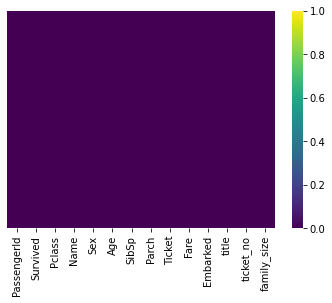

In [21]:
sns.heatmap(df.isnull(),cmap='viridis',yticklabels=False,annot=False)

In [333]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    float64
 11  title        891 non-null    object 
 12  ticket_no    891 non-null    object 
 13  family_size  891 non-null    int64  
dtypes: float64(3), int64(7), object(4)
memory usage: 97.6+ KB


In [334]:
df['ticket_no'].nunique()

339

In [22]:
def tokenizer(mess):
    removed = [i for i in mess if i not in string.punctuation]
    removed = ''.join(removed)
    return removed

In [23]:
df['title'] = df['title'].apply(tokenizer)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,title,ticket_no,family_size
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0.0,Mr,21171,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1.0,Mrs,17599,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0.0,Miss,31012,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0.0,Mrs,11380,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0.0,Mr,37345,1


In [24]:
df['title'].unique()
df['title'].iloc[513] = 'Mrs'

In [25]:
df['title'].iloc[513]

'Mrs'

In [26]:
df['title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Miss ', 'Dr', 'Mme',
       'Ms', 'Major', 'Lady ', 'Sir', 'Mlle', 'Col', 'Mlle ', 'Capt',
       'the Countess', 'Jonkheer'], dtype=object)

In [27]:
df['title'][df['title']=='Miss ']

199    Miss 
427    Miss 
Name: title, dtype: object

In [28]:
df['title'].iloc[199] = 'Miss'
df['title'].iloc[427] = 'Miss'
df['title'].iloc[710] = 'Mlle'

In [29]:
df['title'][df['title']=='Mlle ']

Series([], Name: title, dtype: object)

In [30]:
df['title'].nunique()

17

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    float64
 11  title        891 non-null    object 
 12  ticket_no    891 non-null    object 
 13  family_size  891 non-null    int64  
dtypes: float64(3), int64(7), object(4)
memory usage: 97.6+ KB


In [32]:
df_new = df.dropna()
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    int64  
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    float64
 11  title        889 non-null    object 
 12  ticket_no    889 non-null    object 
 13  family_size  889 non-null    int64  
dtypes: float64(3), int64(7), object(4)
memory usage: 104.2+ KB


In [33]:
df_new.drop(['Fare'],inplace=True,axis=1)
df_new.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Embarked,title,ticket_no,family_size
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,0.0,Mr,21171,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,1.0,Mrs,17599,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,0.0,Miss,31012,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,0.0,Mrs,11380,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,0.0,Mr,37345,1


In [347]:
df_new.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Embarked,title,ticket_no,family_size
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,0.0,Mr,21171,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,1.0,Mrs,17599,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,0.0,Miss,31012,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,0.0,Mrs,11380,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,0.0,Mr,37345,1


In [34]:
df_new2 = pd.get_dummies(data=df_new,columns=['title'],drop_first=True)
df_new2.head(2)
df_new2.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Embarked', 'ticket_no', 'family_size', 'title_Col',
       'title_Don', 'title_Dr', 'title_Jonkheer', 'title_Lady ', 'title_Major',
       'title_Master', 'title_Miss', 'title_Mlle', 'title_Mme', 'title_Mr',
       'title_Mrs', 'title_Ms', 'title_Rev', 'title_Sir',
       'title_the Countess'],
      dtype='object')

In [37]:
x = df_new2.drop(['PassengerId','Survived','Name','SibSp','Parch','Ticket','ticket_no'],axis=1)
y = df_new2[['Survived']]
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5,test_size=0.3)
cross_val_score(RandomForestClassifier(),x,y,cv=cv)



array([0.76779026, 0.80524345, 0.78277154, 0.76779026, 0.8164794 ])

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
def hyper_parameter_tuning(x,y):
    algorithms = {'logistic_regression':{'model':LogisticRegression(),'params':{'fit_intercept':[True, False],'dual':[True, False]}},
                   'random_forests':{'model':RandomForestClassifier(),'params':{'criterion':['gini','entropy'],'n_estimators':[i for i in range(0,100)]}},
                   'multinomial_naive_bayes':{'model':MultinomialNB(),'params':{'alpha':[0.0,1.0],'fit_prior':[True,False]}},
                   'SVM':{'model':SVC(), 'params':{'shrinking':[True,False],'probability':[True,False],'verbose':[True,False],'kernel':['linear','rbf']}},
                   'decision_tree':{'model':DecisionTreeClassifier(),'params':{'criterion':['gini','entropy'],'splitter':['best','random']}}}
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.3)
    for name, config in algorithms.items():
                  gs = RandomizedSearchCV(config['model'], config['params'],cv=cv,return_train_score=False)
                  gs.fit(x,y)
                  scores.append({'model': name,'best_score':gs.best_score_,'best_params':gs.best_params_})
    df = pd.DataFrame(data=scores,columns=['model','best_score','best_params'])
    return df
hyper_parameter_tuning(x,y)                

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

In [56]:
model = pd.DataFrame(columns=['Score'])
models = [LogisticRegression(fit_intercept=True,dual=False),RandomForestClassifier(n_estimators=62,criterion='entropy'),MultinomialNB(fit_prior=True,alpha=0.0),SVC(verbose=True),DecisionTreeClassifier(splitter='best',criterion='entropy')]
x = df_new2.drop(columns=['Survived','Name','Ticket','ticket_no','Parch','SibSp'],axis=1)
y = df_new2[['Survived']]
for j,i in enumerate(models):
    txt_train,txt_test,label_train,label_test = train_test_split(x,y,test_size=0.3)
    i.fit(txt_train,label_train)
    score = i.score(txt_test,label_test)
    model.loc[str(models[j])[:str(models[j]).index('(')]] = score*100
    
model.sort_values(by='Score',ascending=False)

[LibSVM]

,Score
LogisticRegression,82.397004
RandomForestClassifier,80.524345
MultinomialNB,76.779026
DecisionTreeClassifier,74.906367
SVC,60.674157


In [295]:
lr = RandomForestClassifier(n_estimators = 1000)

In [296]:
x= df_new[['Pclass','Sex','family_size','Parch','SibSp','Embarked','Age']]
y = df_new['Survived']



In [297]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [298]:
lr.fit(x_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [299]:
predictions=lr.predict(x_test)

In [263]:
from sklearn.metrics import classification_report

In [300]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       169
           1       0.76      0.69      0.72        98

    accuracy                           0.81       267
   macro avg       0.79      0.78      0.79       267
weighted avg       0.80      0.81      0.80       267



In [303]:
print(lr.score(x_train,y_train))

0.9405144694533762


In [55]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

In [283]:
print(confusion_matrix(y_test,predictions))

[[148  25]
 [ 24  70]]


In [292]:
y_predict = lr.predict_proba(x_test)[::,1]
fpr,tpr,_ = roc_curve(y_test,y_predict)

Text(0.5, 0, 'False Positive Rate')

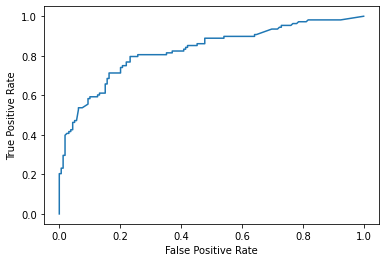

In [293]:
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [155]:
from sklearn.ensemble import RandomForestClassifier

In [157]:
rfr = RandomForestClassifier(n_estimators = 1000)

In [158]:
rfr.fit(x_train,y_train)
prediction = rfr.predict(x_test)

In [159]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84       112
           1       0.72      0.79      0.75        66

    accuracy                           0.81       178
   macro avg       0.80      0.80      0.80       178
weighted avg       0.81      0.81      0.81       178

